In [2]:
!pip install SimpleITK

     |████████████████████████████████| 48.4 MB 2.0 MB/s 


In [3]:
import os
import numpy as np
import cv2
import SimpleITK as sitk
from matplotlib import pyplot as plt

In [4]:
def loadMask(path):
    reader = sitk.ImageFileReader()
    reader.SetFileName(path)
    sitkMask = reader.Execute();
    mask = sitk.GetArrayFromImage(sitkMask)
    
    return mask

In [5]:
def show(a, title):
    plt.imshow(a)
    plt.title(title)
    plt.show()

In [6]:
groundtruth_mask = loadMask("GTmask.png")
predicted_mask = loadMask("PredictMask.png")

class1Color = (255, 0, 0)
class2Color = (0, 255, 0)

groundtruth_maskRGB = np.zeros((groundtruth_mask.shape[0], groundtruth_mask.shape[1], 3), dtype = np.uint8)
groundtruth_maskRGB[groundtruth_mask == 1] = class1Color
groundtruth_maskRGB[groundtruth_mask == 2] = class2Color

predicted_maskRGB = np.zeros((predicted_mask.shape[0], predicted_mask.shape[1], 3), dtype = np.uint8)
predicted_maskRGB[predicted_mask == 1] = class1Color
predicted_maskRGB[predicted_mask == 2] = class2Color

In [8]:
maskr=np.copy(groundtruth_maskRGB[:,:,0])
maskg=np.copy(groundtruth_maskRGB[:,:,1])

In [9]:
kernel=np.ones((3,3))

In [11]:
erosionr=cv2.erode(maskr, kernel,iterations=1) 
dilationr=cv2.dilate(maskr, kernel, iterations=1)

erosiong=cv2.erode(maskg, kernel, iterations=1) 
dilationg=cv2.dilate(maskg, kernel, iterations=1)

In [12]:
eroded_gt=np.copy(groundtruth_maskRGB)
eroded_gt[:,:,0]=erosionr
eroded_gt[:,:,1]=erosiong

dilated_gt=np.copy(groundtruth_maskRGB)
dilated_gt[:,:,0]=dilationr
dilated_gt[:,:,1]=dilationg

eroded_gt.shape

(1080, 1920, 3)

In [13]:
groundtruth_mask=np.where(groundtruth_mask>0,255,0)
eroded_gt=np.where(eroded_gt>0,255,0)
dilated_gt=np.where(dilated_gt>0,255,0)
predicted_mask=np.where(predicted_mask>0,255,0)

In [14]:
totalfp=0
totalfn=0
totaltp=0
totaltn=0

In [15]:
fpimg=np.where(np.logical_and(dilated_gt==0, predicted_maskRGB==255), 255, 0) 
fp=np.count_nonzero(fpimg)
totalfp=totalfp+fp

fnimg=np.where(np.logical_and(eroded_gt==255, predicted_maskRGB==0), 255, 0)
fn=np.count_nonzero(fnimg)                   
totalfn=totalfn+fn

tp=(np.count_nonzero(predicted_maskRGB)-fp)
totaltp=totaltp+tp

area=predicted_maskRGB.shape[0]*predicted_maskRGB.shape[1] 
tn=area-(fp+fn+tp)
totaltn=totaltn+tn

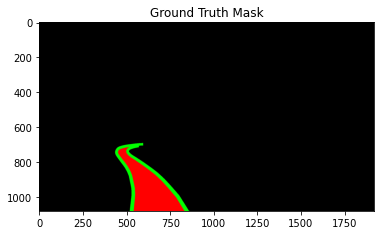

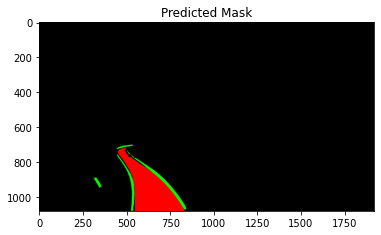

In [7]:
show(groundtruth_maskRGB, "Ground Truth Mask")
show(predicted_maskRGB, "Predicted Mask")

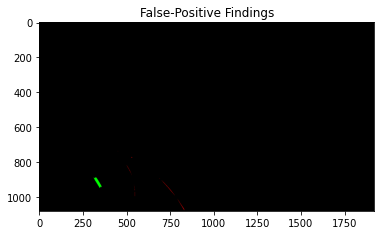

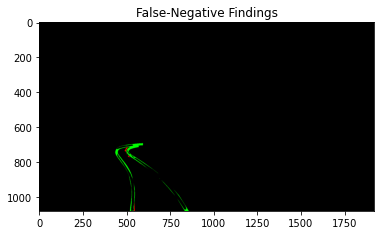

In [16]:
show(fpimg, "False-Positive Findings")
show(fnimg, "False-Negative Findings")

In [17]:
print("Total False-Positive (pixel base):",totalfp)
print("Total False-Negative (pixel base):",totalfn)
print("Total True-Positive (pixel base):",totaltp)
print("Total True-Negative (pixel base):",totaltn)
print("Total Area of Image:", area)

Total False-Positive (pixel base): 1361
Total False-Negative (pixel base): 6825
Total True-Positive (pixel base): 67227
Total True-Negative (pixel base): 1998187
Total Area of Image: 2073600
